# Example - Apple Inc. stock prices

### Introduction

The file `aapl.csv` contains data on the Apple Inc. stock prices in the Nasdaq stock market, for the year 2019, as published by Yahoo Finance (`finance.yahoo.com/quote/AAPL/history?p=AAPL`). The data come in the typical OHLC format (Open/High/Low/Close).

### The data set

The data set covers 251 trading days. The variables are:

* `date`, the date, as yyyy-mm-dd.

* `open`, the price (US dollars) of the stock at the beginning of the trading day. It can be different from the closing price of the previous trading day.

* `high`, the highest price (US dollars) of the stock on that trading day.

* `low`, the lowest price (US dollars) of the stock on that trading day.

* `close`, the price (US dollars) of the stock at closing time.

* `adj_close`, the closing price adjusted for factors in corporate actions, such as stock splits, dividends, and rights offerings.

* `volume`, the amount of the coin that has been traded on that trading day.

### Importing the data

We are going to create a NumPy recarray containing the data from the CSV file as follows. First, we import NumPy as usual:

In [2]:
import numpy as np

We use the function `recfromcsv` to import the data to a NumPy `recarray`. We use the argument `encoding='utf-8'` because one of the columns of the CSV file is read a string data. Omitting it, we could receive a warning, but nothing else. 

In [9]:
data = np.recfromcsv('aapl.csv', encoding='utf-8')

Now, `data` is a special type of NumPy array:

In [10]:
type(data)

numpy.recarray

We can check the shape of this recarray as if it were a common array:

In [11]:
data.shape

(251,)

Note that `data` is a 1d array, in which every term is a row of the CSV file:

In [12]:
data[:5]

rec.array([('2019-01-02', 154.889999, 158.850006, 154.229996, 157.919998, 154.516388, 37039700),
           ('2019-01-03', 143.979996, 145.720001, 142.      , 142.190002, 139.125412, 91312200),
           ('2019-01-04', 144.529999, 148.550003, 143.800003, 148.259995, 145.064575, 58607100),
           ('2019-01-07', 148.699997, 148.830002, 145.899994, 147.929993, 144.741714, 54777800),
           ('2019-01-08', 149.559998, 151.820007, 148.520004, 150.75    , 147.500916, 41025300)],
          dtype=[('date', '<U10'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('adj_close', '<f8'), ('volume', '<i8')])

Every column of the CSV file keeps the name and is given a data type by Python. This can be controlled more tightly, but we don't have to worry about that for this simple example. `'<U10'` means a string of maximum length 10, `'<f8'` means `float64` (8 bytes), and `'<i8'` means `int64`.

### Is there a trend in the opening price?

We can select one of the columns that contains prices and carry out some elementary analysis, so you get familiar with the way data are managed in NumPy. Suppose that we are interested in a **trend** in the **opening price**. You select the corresponding column as:

In [32]:
open = data['open']

Now, `open` is an ordinary 1d array:

In [33]:
type(open)

numpy.ndarray

In [34]:
open.shape

(251,)

To explore the trend, we use the `matplotlib.pyplot` function `plot`, which returns a **line plot** when a single 1d array is provided. We import `pyplot` in the usual way:

In [35]:
from matplotlib import pyplot as plt

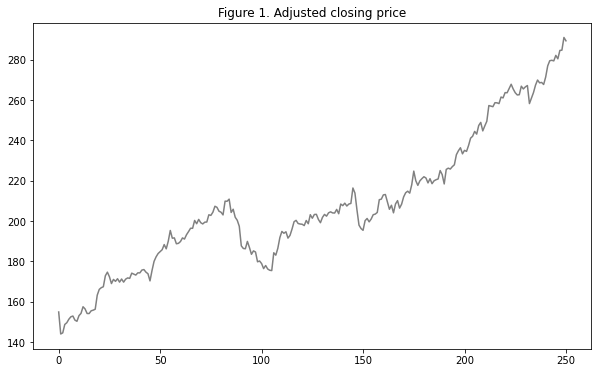

In [36]:
plt.figure(figsize=(10,6))
plt.title('Figure 1. Adjusted closing price')
plt.plot(open, color='gray');

Let us refresh a couple of details:

* The default size is `figsize=(6,4)`. You can set `figsize` as appropriate for your screen.

* The default color is `color='blue'`. Follow your taste.

* The code lines have to be inputted together. The final semicolon skips the Python output, that would be something unreadable for you.

The trend is quite clear. If you want to assess how linear it is, you can use a **correlation coefficient**, just as you would do in Excel. You start by creating a "time" vector t:

In [37]:
t = np.arange(251)
t[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In NumPy, correlations are obtained as **correlation matrices**, so we put together `t` and `open`, applying the function `corrcoef`:

In [38]:
np.corrcoef(np.array([t, open]))

array([[1.        , 0.93309587],
       [0.93309587, 1.        ]])

So, the correlation is quite strong. If you wish to have a more elegant output, you can extract any of the non-diagonal terms and round it to three decimals:

In [39]:
np.corrcoef(np.array([t, open]))[0, 1].round(3)

0.933

### Daily returns

Let us calculate the **daily returns** for the opening price. This is the percentage daily variation of the price, as a percentage of the previous price. The first day in the series does not have a return, since there is no previous price. So `open[1:]` stands for the current price (today) and `open[:-1]` for the previous price (yesterday):

In [40]:
returns = 100*(open[1:]/open[:-1] - 1)

Note that we cannot use `return` as a name for the vector of returns, because the name is taken by Python. A line plot for the returns:

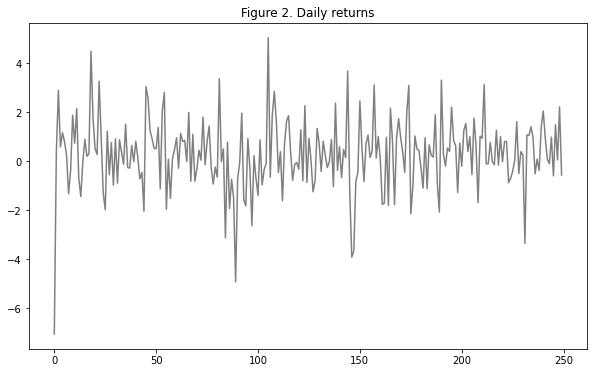

In [41]:
plt.figure(figsize=(10,6))
plt.title('Figure 2. Daily returns')
plt.plot(returns, color='gray');

This plot looks quite stationary, so it makes sense to plot a **histogram** to explore the distribution. We just replace `plot` by `hist`:

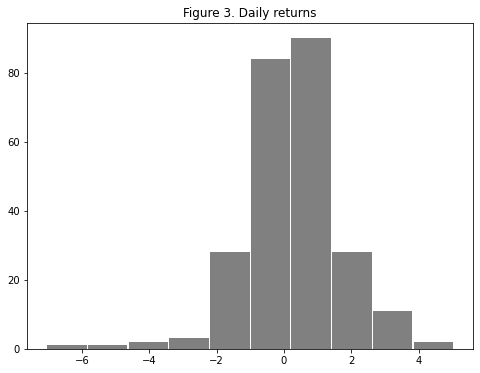

In [42]:
plt.figure(figsize=(8,6))
plt.title('Figure 3. Daily returns')
plt.hist(returns, color='gray', rwidth=0.97);

The default color is blue, as in the line plot. The argument `rwidth=0.97` creates a separation between the histogram bars which improves the visual effect (you may disagree). The distribution is not far from bell-shaped, but the tails are longer than in a normal distribution. This pattern, which statisticians call **kurtosis**, is typical of this type of data.

### Distribution of the trading volume

As a second example, and to get some contrast, we look at the distribution of the trading volume. We extract it as a separate vector as we did for the opnening price:

In [43]:
volume = data['volume']

The histogram is obtained in the same way as for the returns:

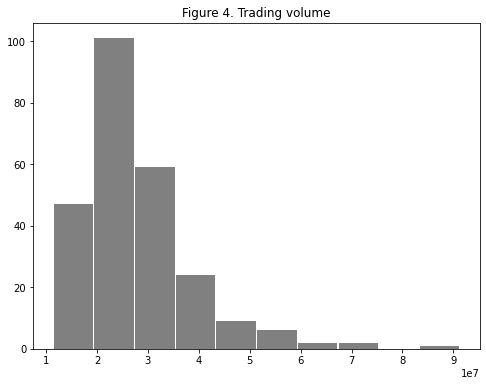

In [44]:
plt.figure(figsize=(8,6))
plt.title('Figure 4. Trading volume')
plt.hist(volume, color='gray', rwidth=0.97);

Now, this is a **skewed distribution**. This type of distribution is typical of variables which represent amounts of money.

###  Association between daily returns and trading volume

Finally, we explore the association between the daily returns and the trading volume. Coincide high or low returns with big small trading volumes? A **scatter plot** may provide some insight on this. The plot can be obtained in Pandas with the method `plot.scatter`. Note that we specify here the *x* and *y* axes.  

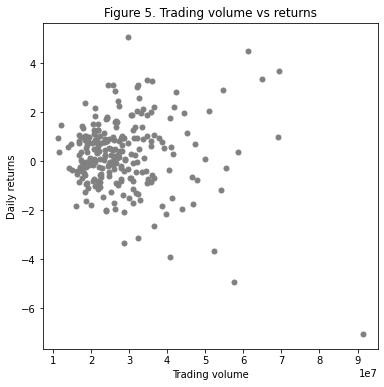

In [52]:
plt.figure(figsize=(6,6))
plt.title('Figure 5. Trading volume vs returns')
plt.scatter(x=volume[1:], y=returns, color='gray', s=25)
plt.xlabel('Trading volume')
plt.ylabel('Daily returns');

A few more commments here:

* We use `volume[1:]`, excluding the first observation of the series to match the returns.

* The argument `s=20` controls the size of the dots, which we adapt to the number of dots.

* In `plt.scatter`, it is better to set the axes specifying `x` and `y`. Then the order does not matter.

A linear association can be dismissed at first sight. This is consistent with the low correlation:

In [54]:
np.corrcoef(np.array([volume[1:], returns]))[0, 1].round(3)

-0.059

Nevertheless, extreme returns seem to coincide with big trading volumes, which makes sense, since volatility fosters trading. If we replace the returns by their absolute value, the correlation gets relevance:

In [55]:
np.corrcoef(np.array([volume[1:], np.abs(returns)]))[0, 1].round(3)

0.495